## Complete STS/STG decoding

In [4]:
import sys
sys.path.append('/home/c10370862/FEED_new/scripts/')
import encoding as enc
import decoding as dec
import behav

import numpy as np
import pandas as pd
import nibabel as nib
from nistats.first_level_model import FirstLevelModel
from nilearn.masking import apply_mask
%matplotlib inline

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [5]:
sub_labels = ['04','13']
task = 'expressive'
space = 'T1w'
filt = ['face']
conf_cols = ['cosine00','cosine01', 
             'trans_x','trans_y','trans_z',
             'rot_x','rot_y','rot_z','csf', 'white_matter']
area_code = [1030,2030]

In [6]:
st_zscores = []
models_events = []
AU_arrays = []
#loop over subjects and load files
for sub in sub_labels:
    imgs, events, conf, func_mask, json = enc.load_and_create_obj(sub, task, space,
                                                                  mask='dseg',
                                                                  skip_missing=True)
    stg_mask = enc.ROI_mask(func_mask, area_code)
    
    #filter events and select confounds
    events = enc.filter_event_type(events,filt,keep=True)
    
    for idx, c in enumerate(conf):
        conf[idx] = c.loc[:, conf_cols]
    
    #fix trial_type
    for idx, e in enumerate(events):
        e = e[e.data_split == 'train']
        e['trial_id'] = e.trial_type
        trial_names = []
        for t in range(e.shape[0]):
            trial_names.append('trial ' + str(t))
        e.trial_type = trial_names
        events[idx] = e
    
    #initialize model and arguments
    n_runs = len(imgs)
    n_trials = len(trial_names)
    n_vox = np.sum((stg_mask).get_data())
    AU_cols = [col for col in events[0].columns if 'AU' in col and col != 'N_AUs']
    
    AU_array_all = np.zeros((n_runs,n_trials,len(AU_cols)))
    z_array_all = np.zeros((n_runs,n_trials,n_vox))
    tr = json.RepetitionTime[0]
    model = FirstLevelModel(t_r=tr,
                            hrf_model='glover + derivative',
                            drift_model=None,
                            smoothing_fwhm=3,
                            mask = stg_mask,
                            verbose=0,
                            n_jobs=10
                           )
    #fit single trials
    for run_idx, run in enumerate(imgs):
        print('fitting run %i out of %i' %(run_idx+1, len(imgs)))
        model.fit(run, events[run_idx], conf[run_idx])
        zscore = np.zeros((n_trials, n_vox))
        print('processing single trial z-scores')
        for trial_ind, trial in enumerate(trial_names):
            z = model.compute_contrast(trial, output_type = 'z_score')
            z = apply_mask(z, model.mask_img)
            z_array_all[run_idx, trial_ind,:] = z
        AU_array_all[run_idx,:,:] = events[run_idx].loc[:,AU_cols].values
    
    st_zscores.append(z_array_all)
    AU_arrays.append(AU_array_all)
    models_events.append(events)

('loading files '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-04/ses-face1/func/sub-04_ses-face1_task-expressive_run-3_space-T1w_desc-preproc_bold.nii.gz, '
 '/srv/FEED/mri_data/bids/sub-04/ses-face1/func/sub-04_ses-face1_task-expressive_run-3_events.tsv, '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-04/ses-face1/func/sub-04_ses-face1_task-expressive_run-3_desc-confounds_regressors.tsv')
('loading files '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-04/ses-face1/func/sub-04_ses-face1_task-expressive_run-4_space-T1w_desc-preproc_bold.nii.gz, '
 '/srv/FEED/mri_data/bids/sub-04/ses-face1/func/sub-04_ses-face1_task-expressive_run-4_events.tsv, '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-04/ses-face1/func/sub-04_ses-face1_task-expressive_run-4_desc-confounds_regressors.tsv')
('loading files '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-04/ses-face1/func/sub-04_ses-face1_task-expressive_run-5_space-T1w_desc-preproc_bold.nii.gz, '
 '/srv/FEED/mri_data/bids/

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: The parameter "mask" will be removed in next release of Nistats. Please use the parameter "mask_img" instead.
/opt/conda/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' 

fitting run 1 out of 22
processing single trial z-scores
fitting run 2 out of 22
processing single trial z-scores
fitting run 3 out of 22
processing single trial z-scores
fitting run 4 out of 22
processing single trial z-scores
fitting run 5 out of 22
processing single trial z-scores
fitting run 6 out of 22
processing single trial z-scores
fitting run 7 out of 22
processing single trial z-scores
fitting run 8 out of 22
processing single trial z-scores
fitting run 9 out of 22
processing single trial z-scores
fitting run 10 out of 22
processing single trial z-scores
fitting run 11 out of 22
processing single trial z-scores
fitting run 12 out of 22
processing single trial z-scores
fitting run 13 out of 22
processing single trial z-scores
fitting run 14 out of 22
processing single trial z-scores
fitting run 15 out of 22
processing single trial z-scores
fitting run 16 out of 22
processing single trial z-scores
fitting run 17 out of 22
processing single trial z-scores
fitting run 18 out of 2

('loading files '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-13/ses-face3/func/sub-13_ses-face3_task-expressive_run-5_space-T1w_desc-preproc_bold.nii.gz, '
 '/srv/FEED/mri_data/bids/sub-13/ses-face3/func/sub-13_ses-face3_task-expressive_run-5_events.tsv, '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-13/ses-face3/func/sub-13_ses-face3_task-expressive_run-5_desc-confounds_regressors.tsv')
('loading files '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-13/ses-face3/func/sub-13_ses-face3_task-expressive_run-7_space-T1w_desc-preproc_bold.nii.gz, '
 '/srv/FEED/mri_data/bids/sub-13/ses-face3/func/sub-13_ses-face3_task-expressive_run-7_events.tsv, '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-13/ses-face3/func/sub-13_ses-face3_task-expressive_run-7_desc-confounds_regressors.tsv')
('loading files '
 '/srv/FEED/mri_data/bids/derivatives/fmriprep/sub-13/ses-face3/func/sub-13_ses-face3_task-expressive_run-8_space-T1w_desc-preproc_bold.nii.gz, '
 '/srv/FEED/mri_data/bids/

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: The parameter "mask" will be removed in next release of Nistats. Please use the parameter "mask_img" instead.
/opt/conda/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' 

fitting run 1 out of 23
processing single trial z-scores
fitting run 2 out of 23
processing single trial z-scores
fitting run 3 out of 23
processing single trial z-scores
fitting run 4 out of 23
processing single trial z-scores
fitting run 5 out of 23
processing single trial z-scores
fitting run 6 out of 23
processing single trial z-scores
fitting run 7 out of 23
processing single trial z-scores
fitting run 8 out of 23
processing single trial z-scores
fitting run 9 out of 23
processing single trial z-scores
fitting run 10 out of 23
processing single trial z-scores
fitting run 11 out of 23
processing single trial z-scores
fitting run 12 out of 23
processing single trial z-scores
fitting run 13 out of 23
processing single trial z-scores
fitting run 14 out of 23
processing single trial z-scores
fitting run 15 out of 23
processing single trial z-scores
fitting run 16 out of 23
processing single trial z-scores
fitting run 17 out of 23
processing single trial z-scores
fitting run 18 out of 2

In [7]:
from glob import glob
import pandas as pd

def create_emo_df(sub, task):

    files = (glob('/srv/FEED/behav_data/sub-{}/*ses-*_task-{}*run*.tsv'.format(sub,task)))
    files.sort()
    #pprint('found the following files for sub-%s: %s' %(sub,[f for f in files]))
    dfs = []
    for i, file in enumerate(files):
        if 'ses-1_' not in file:
            if 'redo' not in file:
                print('skipping file %s' %(file))
                continue
        print('loading file %s' %(file))
        tmp_df = pd.read_csv(file, sep = '\t', index_col=0)
        tmp_df['new_index'] = tmp_df.index+len(tmp_df)*(i)
        tmp_df = tmp_df.set_index(tmp_df.new_index.values)
        dfs.append(tmp_df)
    df = pd.concat(dfs, sort = False)

    df = df.loc[df.rating_category.notna(),:]
    #df = df.loc[df.rating_category != 'Geen van allen']
    df = df.loc[df.data_split == 'train']
    emo_cols = ['rating_category', 'rating_intensity_norm', 'trial_type']
    emo_df = df[emo_cols]
    return emo_df

In [8]:
sub_labels = ['04','13']
task = 'expressive'
events_y = []
for sub_idx, sub in enumerate(sub_labels):
    emo_df = create_emo_df(sub, task)
    for event_idx, e in enumerate(models_events[sub_idx]):
        rating = []
        for trial_idx, trial in enumerate(e.trial_id):
            answer = emo_df.rating_category[emo_df.trial_type == trial]
            rating.append(answer.values[0])
        e['rating_category'] = rating
        models_events[sub_idx][event_idx] = e
    events_y.append(pd.concat(models_events[sub_idx])) 

loading file /srv/FEED/behav_data/sub-04/sub-04_ses-1_task-expressive_run-1.tsv
loading file /srv/FEED/behav_data/sub-04/sub-04_ses-1_task-expressive_run-2.tsv
loading file /srv/FEED/behav_data/sub-04/sub-04_ses-1_task-expressive_run-3.tsv
loading file /srv/FEED/behav_data/sub-04/sub-04_ses-1_task-expressive_run-4.tsv
skipping file /srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-1.tsv
loading file /srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-1_redo.tsv
skipping file /srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-2.tsv
loading file /srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-2_redo.tsv
skipping file /srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-3.tsv
loading file /srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-3_redo.tsv
skipping file /srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-4.tsv
loading file /srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-4_redo.tsv
skipping file /s

In [10]:
from sklearn.model_selection import train_test_split
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

data = zip(st_zscores,events_y, sub_labels)
for st_z, events, sub in data:
    X = np.vstack(st_z)
    y = events.rating_category
    drop = []
    for idx, trial in enumerate(y):
        if trial == 'Geen van allen':
            drop.append(idx)
    X = np.delete(X, drop, axis=0)
    y = y[y != 'Geen van allen']
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    n_trials_test = X_test.shape[0]
    print('test size for sub-%s: %i' %(sub, n_trials_test))
n_test_avg = np.mean([X_test_list[0].shape[0],X_test_list[1].shape[0]])
print('average test size: %.1f'%(n_test_avg))

test size for sub-04: 127
test size for sub-13: 89
average test size: 108.0


In [35]:
import os
import os.path as op
from pathlib import Path
file_path = op.join(str(Path('.').absolute().parent),'files/dec_files')
if not op.exists(file_path):
    os.makedirs(file_path)
for i, sub in enumerate(sub_labels):
    np.savetxt(op.join(file_path, 'neural_fullSTG_X_train_sub-{}'.format(sub)),X_train_list[i], delimiter='\t')
    np.savetxt(op.join(file_path, 'neural_fullSTG_X_test_sub-{}'.format(sub)),X_test_list[i], delimiter='\t')
    y_train_list[i].to_csv(op.join(file_path, 'neural_fullSTG_y_train_sub-{}'.format(sub)),sep = '\t')
    y_test_list[i].to_csv(op.join(file_path, 'neural_fullSTG_y_test_sub-{}'.format(sub)),sep = '\t') 

In [17]:
from sklearn.svm import LinearSVC
auc_long_list = []
cvals = [0.1,0.5,1,10,100,1000,10000]
for cval in cvals:
    clf = LinearSVC(penalty = 'l1', C = cval, max_iter=1500, dual = False)
    data = zip(X_train_list, y_train_list, sub_labels)
    print('calculating model performance for model with parameters: %s' %(clf.get_params()))
    for X, y, sub in data:
        AUC_df = behav.auc_validation_calc(X, y, sub, clf)
        auc_long_list.append(behav.create_long_df(AUC_df))

calculating model performance for model with parameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1500, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


mean AUC score sub-04: 0.509926


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


mean AUC score sub-13: 0.509374
calculating model performance for model with parameters: {'C': 0.5, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1500, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


mean AUC score sub-04: 0.507595


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


mean AUC score sub-13: 0.507683
calculating model performance for model with parameters: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1500, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


mean AUC score sub-04: 0.503747


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KeyboardInterrupt: 

In [19]:
from sklearn.svm import SVC
cvals = [0.1,0.5,1,10,100,1000,10000]
for cval in cvals:
    clf = SVC(kernel = 'linear', class_weight = 'balanced', C=cval)
    print('calculating model performance for model with parameters: %s' %(clf.get_params()))
    auc_long_list = []
    data = zip(X_train_list, y_train_list, sub_labels)
    for X, y, sub in data:
        auc_df = behav.auc_validation_calc(X,y,sub,clf)
        auc_long_list.append(behav.create_long_df(auc_df))

calculating model performance for model with parameters: {'C': 0.1, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
mean AUC score sub-04: 0.514274
mean AUC score sub-13: 0.508183
calculating model performance for model with parameters: {'C': 0.5, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
mean AUC score sub-04: 0.516557
mean AUC score sub-13: 0.502431
calculating model performance for model with parameters: {'C': 1, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 

In [20]:
cvals = [0.1,0.5,1,10,100,1000,10000]
for cval in cvals:
    clf = LinearSVC(penalty = 'l2', class_weight = 'balanced', 
                    C=cval, dual = True, max_iter = 2000
                   )
    print('calculating model performance for model with parameters: %s' %(clf.get_params()))
    auc_long_list = []
    data = zip(X_train_list, y_train_list, sub_labels)
    for X, y, sub in data:
        auc_df = behav.auc_validation_calc(X,y,sub,clf)
        auc_long_list.append(behav.create_long_df(auc_df))

calculating model performance for model with parameters: {'C': 0.1, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 2000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.501495
mean AUC score sub-13: 0.502405
calculating model performance for model with parameters: {'C': 0.5, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 2000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.498374
mean AUC score sub-13: 0.503677
calculating model performance for model with parameters: {'C': 1, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 2000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean

In [22]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [23]:
data = zip(X_train_list, X_test_list, y_train_list, y_test_list)
#do i need a new ohe? could also return it from function above?
ohe = OneHotEncoder(sparse=False)
auc_long_final = []
auc_df_final = []

clf = SVC(kernel = 'linear', class_weight = 'balanced', C=10)

for X_train, X_test, y_train, y_test in data:
    
    names = sorted(y_train.unique())
    auc_dict = {key:[] for key in names}
    y_train = y_train.values[:,np.newaxis]
    y_test = y_test.values[:,np.newaxis]
    
    ohe.fit_transform(y_train)
    
    y_train_star = ohe.transform(y_train)
    y_test_star = ohe.transform(y_test)
    
    clf.fit(X_train, y_train.ravel())
    y_hat = clf.predict(X_test)
    y_hat_star = ohe.transform(y_hat[:,np.newaxis])
    auc_score = roc_auc_score(y_test_star,y_hat_star)

    for i, key in enumerate(names):
        auc_dict[key].append(roc_auc_score(y_test_star[:,i],y_hat_star[:,i]))

    auc_df_final = pd.DataFrame(data=auc_dict)
    auc_df_final['overall AUC score'] = auc_score
    print(auc_score)
    
    auc_long_final.append(behav.create_long_df(auc_df_final))

0.5105880321151599
0.526594442831007


In [37]:
avg_AUC = np.mean([0.5105880321151599,0.526594442831007])
std_AUC = np.std([0.5105880321151599,0.526594442831007])
print(avg_AUC, std_AUC)

0.5185912374730834 0.008003205357923537


In [24]:
for i, (table, sub) in enumerate(zip(auc_long_final, sub_labels)):
    table['subject'] = sub
    auc_long_final[i] = table
auc_long_final = pd.concat(auc_long_final)
auc_long_final

,category,auc_score,subject
0,Bang,0.541964,04
1,Blij,0.477991,04
2,Boos,0.512157,04
3,Verdrietig,0.482759,04
4,Verrassing,0.500510,04
5,Walging,0.548148,04
6,overall AUC score,0.510588,04
0,Bang,0.457251,13
1,Blij,0.514347,13
2,Boos,0.575117,13


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

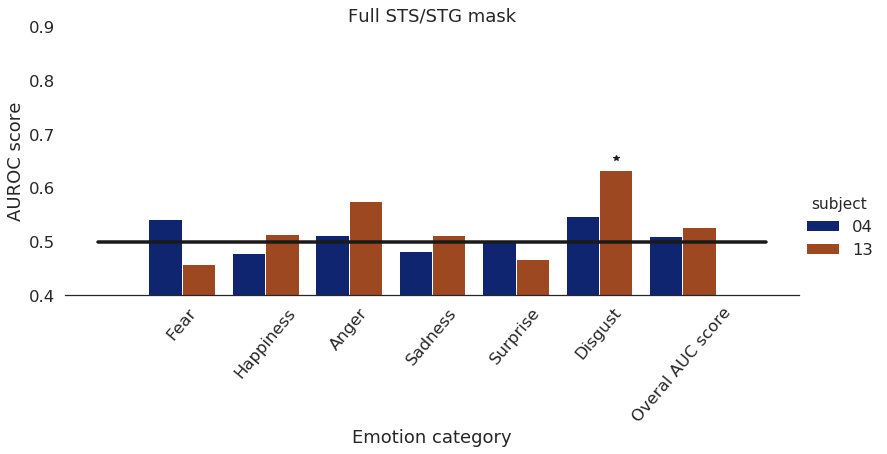

In [42]:
X_labels = ['Fear', 'Happiness', 'Anger', 'Sadness', 'Surprise', 'Disgust', 'Overal AUC score']
sns.set(palette='dark', style='white', font_scale=1.5)


g = sns.catplot(x = 'category',y = 'auc_score', 
                hue = 'subject', kind = 'bar', 
                data = auc_long_final, aspect = 2.3,
               )
g.despine(left = True)

for item in g.ax.get_xticklabels():
    item.set_rotation(50)
g.ax.set_title('Full STS/STG mask')
g.ax.set_ylabel('AUROC score')
g.ax.set_xlabel('Emotion category')
g.ax.set_xticklabels(X_labels)
g.ax.set_ylim((0.4,0.9))
g.ax.plot([-1,7],[0.5,0.5],'k',linewidth = 3.5)
g.ax.plot([5.2], [0.655], '*', c= 'k', ms = 6)

plt.show()

### Permutation

In [31]:
clf = SVC(kernel = 'linear', 
          class_weight = 'balanced', 
          C=10)

n_perm = 1000
auc_scores_all = []
data = zip(X_train_list, X_test_list,y_train_list, y_test_list)

for X_train, X_test, y_train, y_test in data:
    names = sorted(y_train.unique())
    y_train = y_train.values[:,np.newaxis]
    y_train_star = ohe.fit_transform(y_train)
    y_test = y_test.values[:,np.newaxis]
    y_test_star = ohe.transform(y_test)
    auc_scores = np.zeros((n_perm,7))
    
    for perm in range(n_perm):
        if isinstance(perm/50, int):
            print('permutation ', perm)
        np.random.shuffle(X_train)
        auc_dict = {key:[] for key in names}
        clf.fit(X_train, y_train.ravel())
        y_hat_star = ohe.transform(clf.predict(X_test)[:,np.newaxis])
        auc_score = roc_auc_score(y_test_star,y_hat_star)
        for i, key in enumerate(names):
            auc_dict[key].append(roc_auc_score(y_test_star[:,i],y_hat_star[:,i]))

        auc_df = pd.DataFrame(data=auc_dict)
        auc_df['overall AUC score'] = auc_score
        auc_scores[perm,:] = auc_df.values
    auc_scores_all.append(auc_scores)
    

In [32]:
auc_df_04 = auc_long_final[auc_long_final.subject == '04']
auc_df_13 = auc_long_final[auc_long_final.subject == '13']
auc_lists = [auc_df_04, auc_df_13]

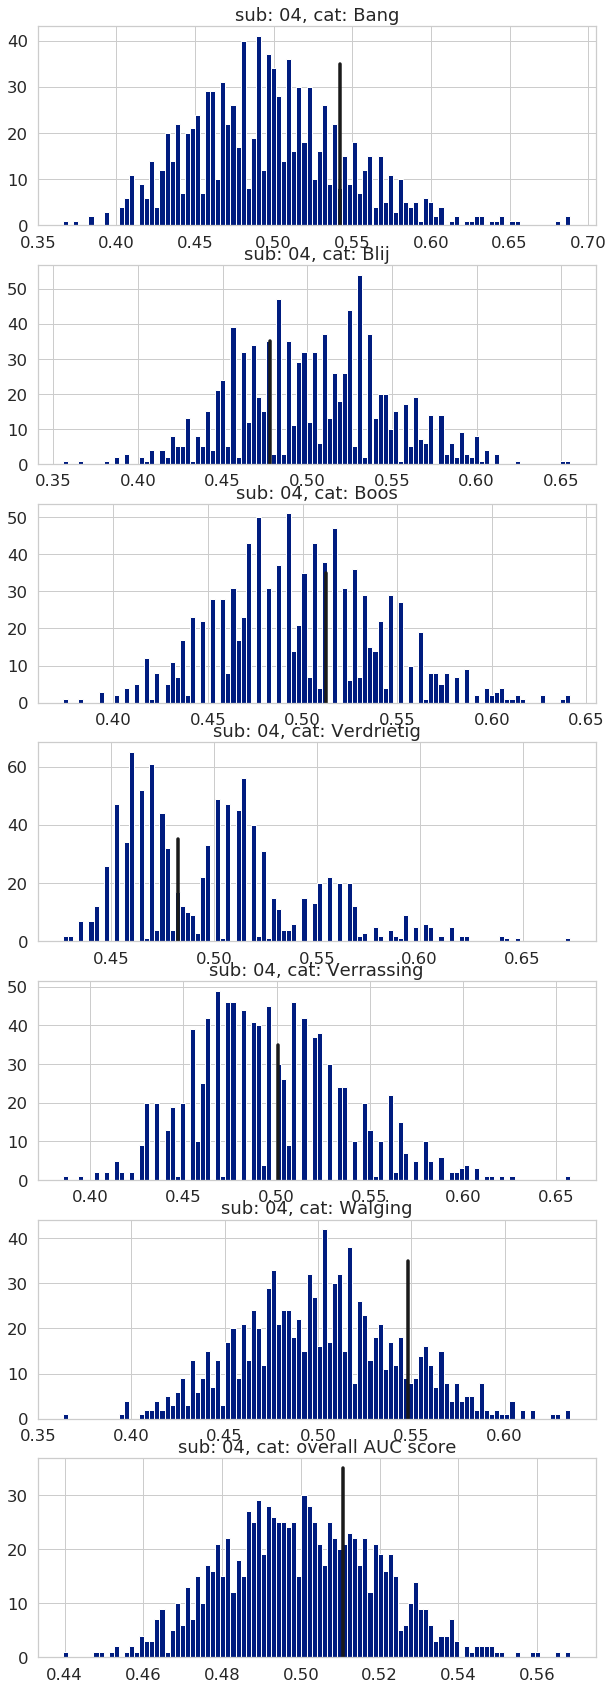

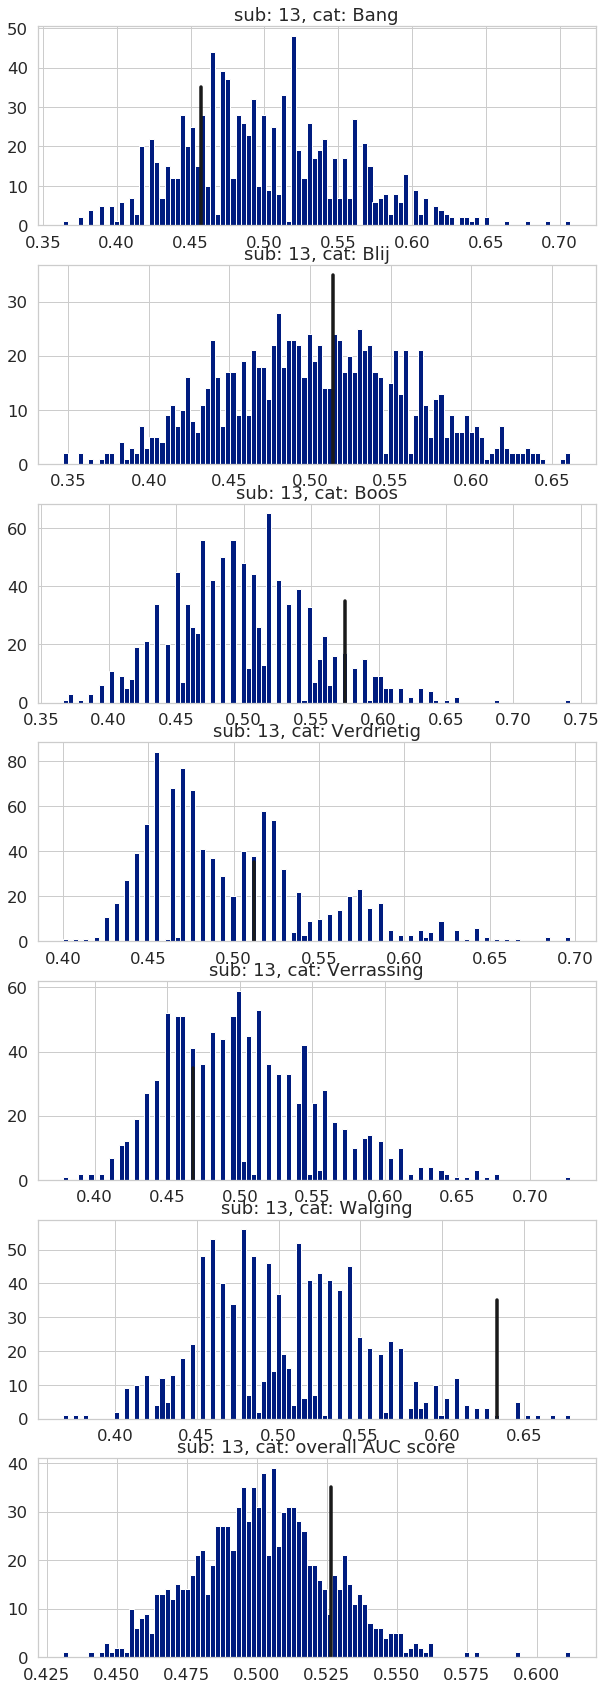

In [33]:
for permscores, auc_list in zip(auc_scores_all,auc_lists):
    fig, ax = plt.subplots(nrows=7,ncols=1, figsize = (10,30))
    for i, cat in enumerate(permscores.T):
        ax[i].hist(cat, bins = 100)
        ax[i].set_title('sub: %s, cat: %s' %(auc_list.loc[i,'subject'],auc_df.columns[i]))
        ax[i].plot([auc_list.loc[i,'auc_score'], auc_list.loc[i,'auc_score']], [0,35],'k',linewidth = 3.5)

In [34]:
for permscores, auc_list in zip(auc_scores_all,auc_lists):
    for i, cat in enumerate(permscores.T):
        pval = (np.sum(auc_list.loc[i, 'auc_score'] <= cat ) +1)/(cat.shape[0]+1)
        print('permuted P-val for subject %s, category: %s = %.3f' %(auc_list.loc[i,'subject'],auc_df.columns[i],pval))

permuted P-val for subject 04, category: Bang = 0.183
permuted P-val for subject 04, category: Blij = 0.697
permuted P-val for subject 04, category: Boos = 0.381
permuted P-val for subject 04, category: Verdrietig = 0.600
permuted P-val for subject 04, category: Verrassing = 0.452
permuted P-val for subject 04, category: Walging = 0.150
permuted P-val for subject 04, category: overall AUC score = 0.306
permuted P-val for subject 13, category: Bang = 0.774
permuted P-val for subject 13, category: Blij = 0.434
permuted P-val for subject 13, category: Boos = 0.092
permuted P-val for subject 13, category: Verdrietig = 0.383
permuted P-val for subject 13, category: Verrassing = 0.732
permuted P-val for subject 13, category: Walging = 0.011
permuted P-val for subject 13, category: overall AUC score = 0.158
